In [55]:
#cargan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#llamamos el dataset
datos = pd.read_csv('framingham.csv')
datos.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [73]:
#se toman las variables con las que se va a trabajar y mostrarmos el top 5
datos[['glucose','diabetes']].head()

,glucose,diabetes
0,77.0,0
1,76.0,0
2,70.0,0
3,103.0,0
4,85.0,0


<Axes: xlabel='glucose', ylabel='diabetes'>

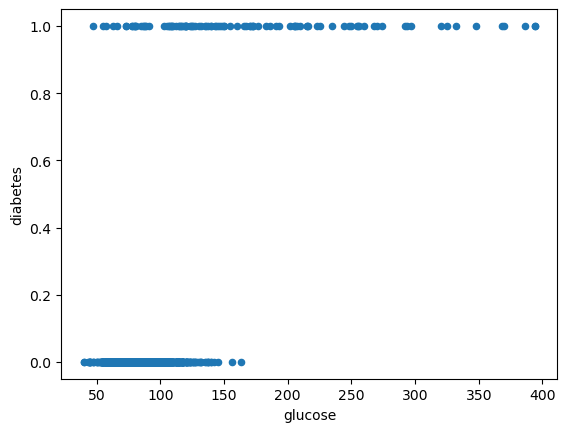

In [74]:
#Grafica de dispersion
datos[['glucose','diabetes']].plot.scatter(x='glucose',y='diabetes')

In [76]:
#cargamos la libreria del modelo de regresion logistica
from sklearn.linear_model import LogisticRegression

# Creamos un modelo de regresión logística

modelo = LogisticRegression()

# Ajustamos el modelo a los datos
x = datos[['glucose']]  
y = datos['diabetes']  

# se elimnan las filas vacias
x = x.dropna() 
y = y.loc[x.index] 

modelo.fit(x, y)

# imprime los parametros

print(f"Pendiente (w): {modelo.coef_}")
print(f"Intercepto (b): {modelo.intercept_}")


Pendiente (w): [[0.08473258]]
Intercepto (b): [-11.89918774]


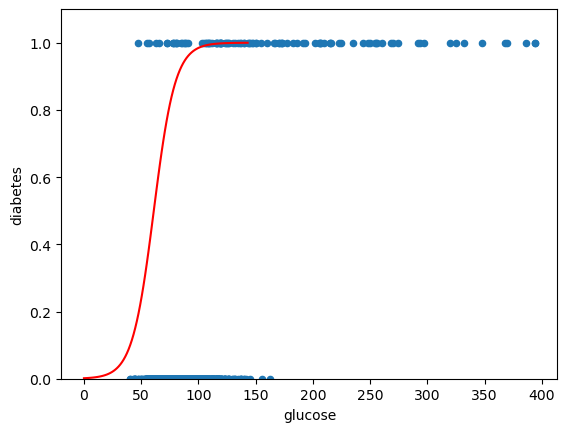

In [77]:
#Grafica de regresión logística 

# puntos de la recta
x = np.linspace(0,datos['heartRate'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
datos.plot.scatter(x='glucose',y='diabetes')
plt.plot(x, y, '-r') 
plt.ylim(0,datos['diabetes'].max()*1.1)
plt.show()